### Homework #2 Course Open Source Energy System Modeling
### *IPCC SR15 scenario assessment*

<img style="float: right; height: 80px; padding-left: 20px;" src="../_static/TU_logo.png">

# Analysis of carbon capture and sequestration (CCS)

This notebook computes indicators and diagnostics of whether CCS is deployed or not in the future by fuel based on the IPCC's _"Special Report on Global Warming of 1.5°C"_.

The scenario data used in this analysis can be accessed and downloaded at [https://data.ene.iiasa.ac.at/iamc-1.5c-explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer).

## Load `pyam` package and other dependencies

In [1]:
import pandas as pd
import numpy as np
import io
import itertools
import yaml
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pyam

from utils import boxplot_by_cat

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


## Import scenario data, categorization and specifications files

The metadata file with scenario categorisation and quantitative indicators can be downloaded at [https://data.ene.iiasa.ac.at/iamc-1.5c-explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer).  
Alternatively, it can be re-created using the notebook `sr15_2.0_categories_indicators`.

The last cell of this section loads and assigns a number of auxiliary lists as defined in the categorization notebook.

In [2]:
sr1p5_regions = pyam.IamDataFrame(data='../data/iamc15_scenario_data_world_r2.0.xlsx')

pyam.utils - INFO: Reading `../data/iamc15_scenario_data_world_r2.0.xlsx`


In [3]:
sr1p5_regions.load_meta('sr15_metadata_indicators_r2.0.xlsx')

pyam.core - INFO: Importing metadata for 416 scenarios (for total of 416)


In [4]:
with open("sr15_specs.yaml", 'r') as stream:
    specs = yaml.load(stream, Loader=yaml.FullLoader)

rc = pyam.run_control()
for item in specs.pop('run_control').items():
    rc.update({item[0]: item[1]})
cats = specs.pop('cats')
all_cats = specs.pop('all_cats')
subcats = specs.pop('subcats')
all_subcats = specs.pop('all_subcats')
plotting_args = specs.pop('plotting_args')
marker= specs.pop('marker')

## Downselect scenario ensemble to categories of interest for this assessment

In [5]:
years = range(2020, 2101, 5)

In [6]:
df = sr1p5_regions.filter(category=cats, year=years)

## Set specifications for filter and plotting and initialize a data list

In [7]:
plot_ylabel = '{} with CCS (EJ)'
save_name = 'output/fig_hw2_{}.{}'
figure_format = 'png'

In [8]:
filter_args = dict(df=sr1p5_regions, category=cats, marker=None, join_meta=True)

In [9]:
def plotting_args(name, panel_label=None, filetype=figure_format):
    return {'categories': cats, 'column': 'category', 'years': range(2020, 2101, 10), 'add_marker': marker,
            'ylabel': plot_ylabel.format(name),
            'save': save_name.format(name if panel_label is None else '{}_{}'.format(panel_label, name), filetype)}

In [10]:
data = []

## Extract timeseries data by fuel for with CCS and without CCS

### Bioenergy
#### with CCS

In [11]:
ccs_bio = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Biomass|Modern|w/ CCS')
        .timeseries(), **filter_args)
)

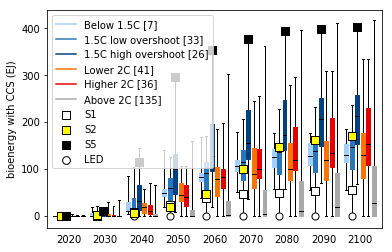

In [12]:
name = 'bioenergy'
fig = boxplot_by_cat(ccs_bio, **plotting_args(name, 'a'))

In [13]:
data.append(('Bioenergy with CCS', ccs_bio))

#### without CCS

In [14]:
no_ccs_bio = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Biomass|Modern|w/o CCS')
        .timeseries(), **filter_args)
)

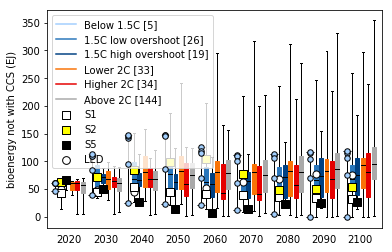

In [15]:
name = 'bioenergy not'
fig = boxplot_by_cat(no_ccs_bio, **plotting_args(name, 'a'))

In [16]:
data.append(('Bioenergy without CCS', no_ccs_bio))

## Findings from Bioenergy
Bioenergy without CCS rises slightly between 2020 and 2100, but there is no big trend observable. However, Bioenergy with CCS increases from neglegible production in 2020 to more than 100 EJ in 2100. This means that bioenergy is projected to produce more energy in unit with CCS than without CCS and that it is used to achieve negative emissions towards the end of the century.

### Coal
#### with CCS

In [17]:
ccs_coal = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Coal|w/ CCS')
        .timeseries(), **filter_args)
)

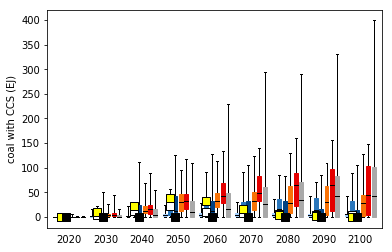

In [18]:
name = 'coal'
boxplot_by_cat(ccs_coal, **plotting_args(name, 'b'), legend=False)

In [19]:
data.append(('Coal with CCS', ccs_coal))

#### without CCS

In [20]:
no_ccs_coal = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Coal|w/o CCS')
        .timeseries(), **filter_args)
)

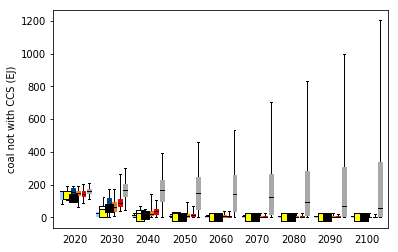

In [21]:
name = 'coal not'
boxplot_by_cat(no_ccs_coal, **plotting_args(name, 'b'), legend=False)

In [22]:
data.append(('Coal without CCS', ccs_coal))

## Findings from coal
Coal engery without vanishes in all scenarios except for the "Above 2C" scenario latest in the middle of this century. The higher the accepted temperature increase, the higher the projected energy production from coal with CCS in the scenarios.

### Gas
#### with CCS

In [23]:
ccs_gas = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Gas|w/ CCS')
        .timeseries(), **filter_args)
)

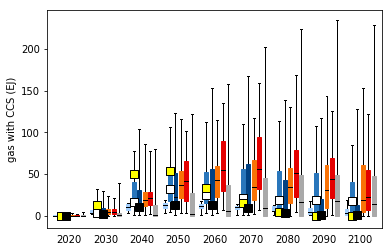

In [24]:
name = 'gas'
boxplot_by_cat(ccs_gas, **plotting_args(name, 'c'), legend=False)

In [25]:
data.append(('Gas with CCS', ccs_gas))

#### without CCS

In [26]:
no_ccs_gas = (
    pyam.filter_by_meta(
        df.filter(variable='Primary Energy|Gas|w/o CCS')
        .timeseries(), **filter_args)
)

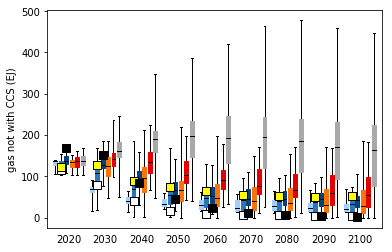

In [27]:
name = 'gas not'
boxplot_by_cat(no_ccs_gas, **plotting_args(name, 'c'), legend=False)

In [28]:
data.append(('Gas without CCS', ccs_gas))

## Findings from gas
Energy production from gas is still significant in 2100 in a broad range of scenarios. In contrast to bioenergy, this means there are projected positive emissions from gas which then have to be compensated for in another way in a decarbonized world. Interestingly, energy generation from gas without CCS is around the same as gas with CCS in 2100. 